# Покемоны и AB-тестирование 


## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [1]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [2]:
pokemon = pd.read_csv('pokemon.csv')  
pokemon.head() 

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


- вывод двух графиков 

In [3]:
def two_histograms(x, y, label1='graph1', label2='graph2', c1='#000', c2='red', bs= 45, edc='#000'):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    
    plt.figure(figsize=(15, 10))
    x.hist(alpha=0.7, bins = bs, color=c1, weights=[1./len(x)]*len(x), label=label1, edgecolor=edc)  
    y.hist(alpha=0.7, bins = bs, color=c2, weights=[1./len(y)]*len(y), label=label2, edgecolor=edc)
    plt.axvline(x.mean(), color='green', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])
    plt.legend(loc='upper right', bbox_to_anchor=(0.90, 0.90))

- колонка class с классами 'Grass' 'Rock'

In [4]:
def Grass_Rock(row):
    if (row['Class 1'] == 'Grass') | (row['Class 2'] == 'Grass'):
        return 'Grass'
    elif (row['Class 1'] == 'Rock') | (row['Class 2'] == 'Rock'):
        return 'Rock'

- колонка class с классами 'Normal' 'Water'

In [5]:
def Normal_Water(row):
    if (row['Class 1'] == 'Normal') | (row['Class 2'] == 'Normal'):
        return 'Normal'
    elif (row['Class 1'] == 'Water') | (row['Class 2'] == 'Water'):
        return 'Water'

- сумма и умножение значений 

In [6]:
# Сумма значений у покемонов 
def summ(row):
    val = row['HP'] + row['Attack'] + row['Defense']
    return val
# произведение значений у покемонов 
def multi(row):
    val = row['HP'] * row['Attack'] * row['Defense']
    return val

- К последней задаче

In [7]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']

def best_class(row):
    if (row['Class 1'] == best_defence_class[0]) | (row['Class 2'] == best_defence_class[0]):
        return best_defence_class[0]
    elif (row['Class 1'] == best_defence_class[1]) | (row['Class 2'] == best_defence_class[1]):
        return best_defence_class[1]
    elif (row['Class 1'] == best_defence_class[2]) | (row['Class 2'] == best_defence_class[2]):
        return best_defence_class[2]
    elif (row['Class 1'] == best_defence_class[3]) | (row['Class 2'] == best_defence_class[3]):
        return best_defence_class[3]

<div class="alert alert-info"style="border: 4px solid #3A2324;background: #E1E6E1;  color: #3A2324">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


- создаем новый DF с необходимыми столбцами
- Удаляем строки содержащий оба класса  ('Grass', 'Rock')
- Создаем новый столбец, где указываем необходимые имеющиеся классы ('Grass', 'Rock') 
- Удаляем строки содержащие None, то есть где не имеются необходимые классы

In [8]:
#  новый DF
pokemon_1 = pd.DataFrame(pokemon)

# удаляем строки С обоими классами 
pokemon_1.drop(pokemon_1.index[(pokemon_1['Class 1'] == 'Rock') & \
                               (pokemon_1['Class 2'] == 'Grass')], inplace = True)
pokemon_1.drop(pokemon_1.index[(pokemon_1['Class 2'] == 'Rock') & \
                              (pokemon_1['Class 1'] == 'Grass')], inplace = True)
#  новый столбец
pokemon_1['class'] = pokemon.apply(Grass_Rock, axis=1)

# # Удаляем строки
pokemon_1.dropna(inplace=True)
pokemon_1.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,class
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,Grass
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,Grass
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,Grass
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,Grass
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False,Grass


- считаем для каждого класса значения: среднее, количество, сумма 

In [41]:
values = pokemon_1.groupby('class').agg({'Attack': ['mean', 'count', 'sum']})
values

Attack            
            mean count   sum
class                       
Grass  76.433333    60  4586
Rock   89.574468    47  4210

In [51]:
# как вытащить значение только среднего значения – не определила 
Grass_mean = 76
Rock_mean = 89
percent = 1
if Grass_mean > Rock_mean:
    p = (Grass_mean - Rock_mean) / Rock_mean
    if p >= 0.2:
        print(f'Grass сильнее Rock на {round((p * percent)*100)}%')
    else:
        print(f'Grass не значительно сильнее Rock, на {round((p * percent)*100)}%')
else:
    p = (Rock_mean - Grass_mean) / Rock_mean
    if p >= 0.2:
        print(f'Rock сильнее Grass на {round((p * percent)*100)}%')
    else:
        print(f'Rock не значительно сильнее Grass, на {round((p * percent)*100)}%')

Rock не значительно сильнее Grass, на 15%


## Рисуем визуал  

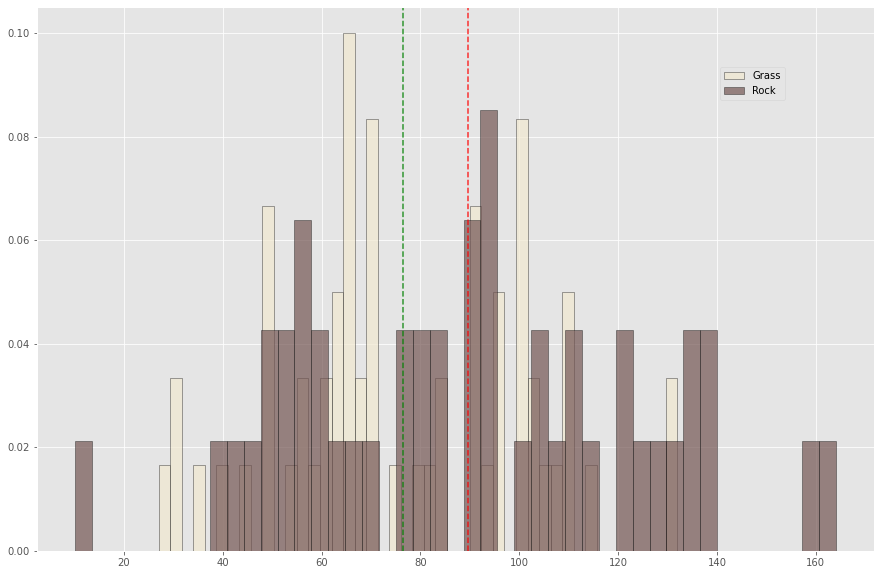

In [47]:
Grass = pokemon_1.loc[pokemon_1['class'] == 'Grass']
Rock = pokemon_1.loc[pokemon_1['class'] == 'Rock']

two_histograms(Grass['Attack'], Rock['Attack'], 'Grass', 'Rock', c1='#F1E8D0', c2='#735553')

Grass - black
Rock - green


<AxesSubplot:>

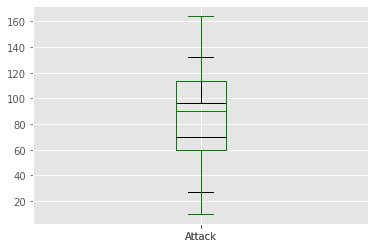

In [52]:
print(f'Grass - black\nRock - green')
pokemon_1[(pokemon_1['class'] == 'Grass')].boxplot(column=['Attack'], color='#000')
pokemon_1[(pokemon_1['class'] == 'Rock')].boxplot(column=['Attack'], color='green')


## по гистограмме и boxplot выводим класс grass более объемным

In [53]:
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
import scipy.stats as stats

val = f_oneway(pokemon_1[(pokemon_1['class'] == 'Grass')]['Attack'],
                pokemon_1[(pokemon_1['class'] == 'Rock')]['Attack'])
val.pvalue

0.02451871154830537

## p-value очень низкий, не могу ничего сказать по этому значение - не понимаю в чем значимость. Из лекции не поняла

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

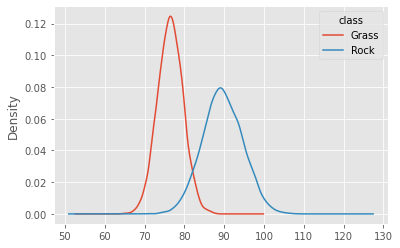

In [54]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(10000):
    boot_mean = pokemon_1.sample(frac=1, replace=True).groupby(
        'class')['Attack'].mean()  
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

<p style='font-size: 19px; padding: 33px;border:1px solid #3A2324 ;color: #3A2324'>Если судить по Bootstrap и Boxplot, покемоны класса Grass намного сильнее класса Rock! По средним значением Rock немного преобладает, я опираюсь больше на Bootstrap</p>

<div style='padding: 66px'></div>

<div class="alert alert-info" style="border: 4px solid #3A2324;background: #E1E6E1;  color: #3A2324">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

- создаем новый DF с необходимыми столбцами
- Удаляем строки содержащий оба класса  ('Normal', 'Water')
- Создаем новый столбец, где указываем необходимые имеющиеся классы ('Normal', 'Water')
- Удаляем строки содержащие None, то есть где не имеются необходимые классы

In [55]:
#  новый DF
pokemon_2 = pd.DataFrame(pokemon)

# удаляем строки С обоими классами 
pokemon_2.drop(pokemon_2.index[(pokemon_2['Class 1'] == 'Water') & \
                               (pokemon_2['Class 2'] == 'Normal')], inplace = True)
pokemon_2.drop(pokemon_2.index[(pokemon_2['Class 2'] == 'Water') & \
                              (pokemon_2['Class 1'] == 'Normal')], inplace = True)
#  новый столбец
pokemon_2['class'] = pokemon.apply(Normal_Water, axis=1)

# # Удаляем строки
pokemon_2.dropna(inplace=True)
pokemon_2.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,class
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False,Normal
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False,Normal
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False,Normal
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False,Normal
26,27,Spearow,Normal,Flying,40,60,30,31,31,70,False,Normal


- считаем значение по скорости 

In [56]:
pokemon_2.groupby('class').agg({'Speed': ['mean', 'count', 'sum']})

Speed            
            mean count   sum
class                       
Normal  76.52500    40  3061
Water   62.30303    66  4112

In [73]:
# как вытащить значение только среднего значения – не определила 
Normal_mean = 76
Water_mean = 62
percent = 1
if Normal_mean > Water_mean:
    p = (Normal_mean - Water_mean) / Water_mean
    if p >= 0.2:
        print(f'Normal быстрее Water на {round((p * percent)*100)}%')
    else:
        print(f'Normal не значительно быстрее Water, на {round((p * percent)*100)}%')
else:
    p = (Water_mean - Normal_mean) / Water_mean 
    if p >= 0.2:
        print(f'Water быстрее Normal на {round((p * percent)*100)}%')
    else:
        print(f'Water не значительно быстрее Normal, на {round((p * percent)*100)}%')

Normal быстрее Water на 23%


## здесь мы видим больший объем в количестве сумме у класса Water, среднее значение преобладает у Normal. Отсюда вывод, класс Normal – более быстрый 

## Визуал 

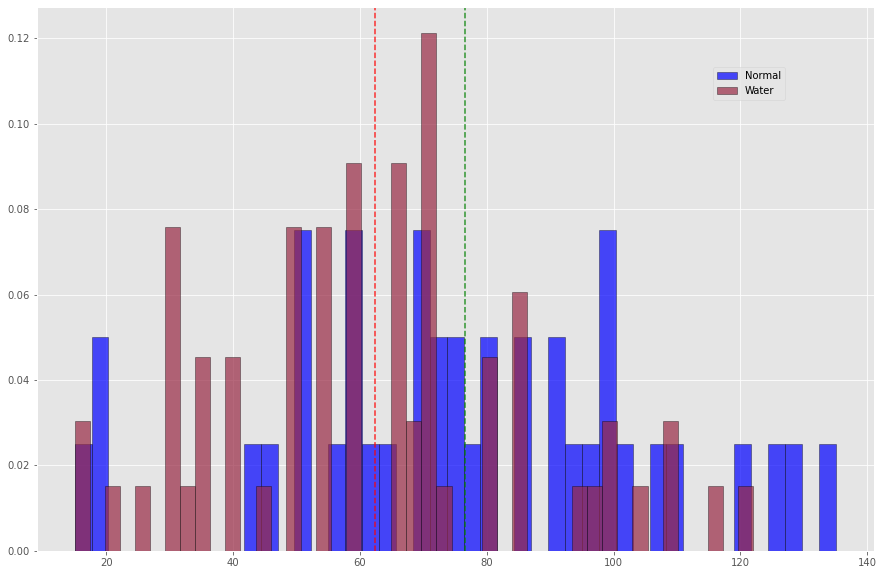

In [59]:
Normal = pokemon_2.loc[pokemon_2['class'] == 'Normal']
Water = pokemon_2.loc[pokemon_2['class'] == 'Water']

two_histograms(Normal['Speed'], Water['Speed'], 'Normal', 'Water', c1='blue', c2='#992944')

Normal - red
Water - black


<AxesSubplot:>

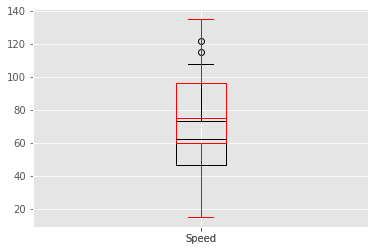

In [60]:
print(f'Normal - red\nWater - black')
pokemon_2[(pokemon_2['class'] == 'Water')].boxplot(column=['Speed'], color='black')
pokemon_2[(pokemon_2['class'] == 'Normal')].boxplot(column=['Speed'], color='red')

## По графикам видим что класс Normal круче

In [62]:
val = f_oneway(pokemon_2[(pokemon_2['class'] == 'Water')]['Speed'],
                pokemon_2[(pokemon_2['class'] == 'Normal')]['Speed'])
val.pvalue

0.008186940724081587

## p-value низкий, не могу ничего сказать по этому значение - не понимаю в чем значимость 

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

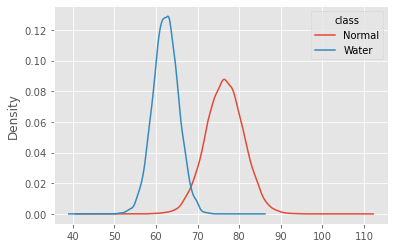

In [63]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(10000):
    boot_mean = pokemon_2.sample(frac=1, replace=True).groupby(
        'class')['Speed'].mean()  
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')


<p style='font-size: 19px; padding: 33px;border:1px solid #3A2324 ;color: #3A2324'>Класс 'Normal' преобладает над классом 'Water'. Профессор возможно теперь совсем перестанет спать </p>

<div style='padding: 66px'></div>

<div class="alert alert-info" style="border: 4px solid #3A2324;background: #E1E6E1;  color: #3A2324">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [64]:
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

- создаем DF с тестируемыми покемонами 

In [65]:
pokemon_3_test = pd.DataFrame(pokemon)
pokemon_3_test = pokemon_3_test.loc[(pokemon_3_test['Name'].isin([treathed_pokemon[0]])) | \
                                    (pokemon_3_test['Name'].isin([treathed_pokemon[1]])) | \
                                    (pokemon_3_test['Name'].isin([treathed_pokemon[2]])) | \
                                    (pokemon_3_test['Name'].isin([treathed_pokemon[3]]))]
pokemon_3_test

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


- И все остальные 

In [66]:
pokemon_3_normal = pd.DataFrame(pokemon)

pokemon_3_normal = pokemon_3_normal.loc[(~pokemon_3_normal['Name'].isin([treathed_pokemon[0]])) | \
                                        (~pokemon_3_normal['Name'].isin([treathed_pokemon[1]])) | \
                                        (~pokemon_3_normal['Name'].isin([treathed_pokemon[2]])) | \
                                        (~pokemon_3_normal['Name'].isin([treathed_pokemon[3]]))]
pokemon_3_normal

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


## проведём расчёты, среднее значение 

In [72]:
print('Тест сыворотки ')
pokemon_3_test.agg({'Speed': ['mean']})

Тест сыворотки 


,Speed
mean,145.0


In [71]:
print('Обычные покемоны')
pokemon_3_normal.agg({'Speed': ['mean']}) 

Обычные покемоны


,Speed
mean,68.2775


In [80]:
# как вытащить значение только среднего значения – не определила 
Normal_mean_3 = 68
Test_mean_3 = 145
percent = 1
if Normal_mean_3 > Test_mean_3:
    p = (Normal_mean_3 - Test_mean_3) / Test_mean_3
    if p >= 0.2:
        print(f'Обычные покемоны быстрее испытуемых на {round((p * percent)*100)}%')
    else:
        print(f'Обычные покемоны не значительно быстрее Испытуемых, на {round((p * percent)*100)}%')
else:
    p = (Test_mean_3 - Normal_mean_3) / Test_mean_3 
    if p >= 0.2:
        print(f'Испытуемые быстрее обычных покемонов на {round((p * percent)*100)}%')
    else:
        print(f'Испытуемые не значительно быстрее обычных покемов, на {round((p * percent)*100)}%')

Испытуемые быстрее обычных покемонов на 53%


### У покемонов, принявших сыворотку, действительно средняя скорость выше 

## визуал 

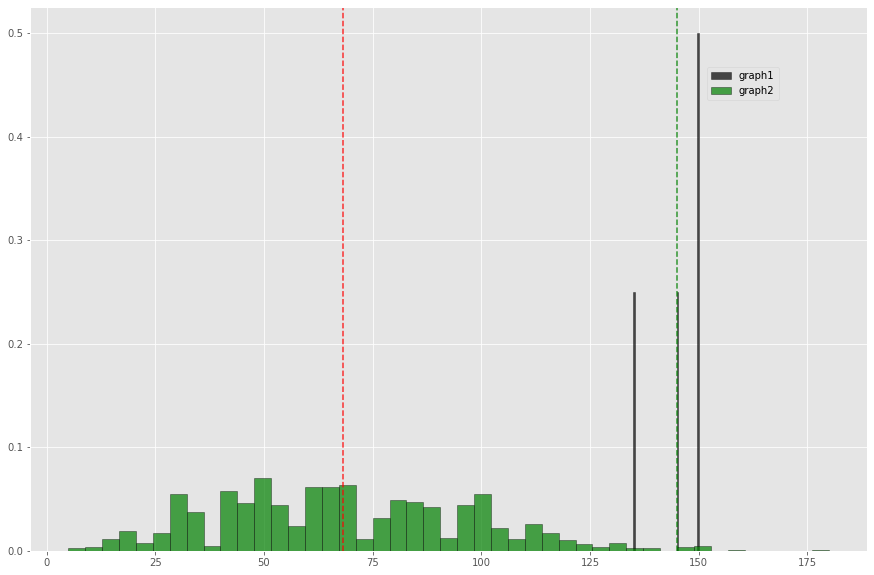

In [81]:
two_histograms(pokemon_3_test['Speed'], pokemon_3_normal['Speed'], c2='green')

Normal - green
Test - black


<AxesSubplot:>

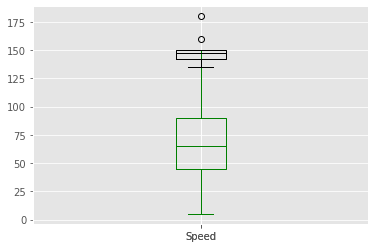

In [82]:
print(f'Normal - green\nTest - black')
pokemon_3_normal.boxplot(column=['Speed'], color='green')
pokemon_3_test.boxplot(column=['Speed'], color='black')


<p style='font-size: 19px; padding: 33px;border:1px solid #3A2324 ;color: #3A2324'>Сыворотка действительно работает! Все графики это подтверждают, среднее значение не отстает</p>

<div style='padding: 66px'></div>

<p style='padding: 66px; color: white; background: #000'>Задача 3 была дублирована в задаче 4 – я удалила задачу 4, перенеся список испытуемых в 3-ю задачу </p>

<div class="alert alert-info" style="border: 4px solid #3A2324;background: #E1E6E1;  color: #3A2324">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [83]:
pokemon_5_legend = pokemon[((pokemon['Legendary'] == True) )]
pokemon_5_normal = pokemon[((pokemon['Legendary'] == False) )]

## Сумма HP, Attack, Defense

In [84]:
pokemon_5_normal['sum'] = pokemon_5_normal.apply(summ, axis=1)
pokemon_5_legend['sum'] = pokemon_5_legend.apply(summ, axis=1)

/var/folders/cq/j6d5znl136gbtfhhcd1pbwbh0000gn/T/ipykernel_78067/1405788491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_5_normal['sum'] = pokemon_5_normal.apply(summ, axis=1)
/var/folders/cq/j6d5znl136gbtfhhcd1pbwbh0000gn/T/ipykernel_78067/1405788491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_5_legend['sum'] = pokemon_5_legend.apply(summ, axis=1)


In [88]:
mean_legend = pokemon_5_legend['sum'].mean()
mean_normal = pokemon_5_normal['sum'].mean()

print(f'Средняя сумма значений легендарных покемонов {round(mean_legend)} \nСредняя сумма значений у обычных покемонов {round(mean_normal)}')


Средняя сумма значений легендарных покемонов 309 
Средняя сумма значений у обычных покемонов 214


## произведение значений 

In [89]:
pokemon_5_normal['multi'] = pokemon_5_normal.apply(multi, axis=1)
pokemon_5_legend['multi'] = pokemon_5_legend.apply(multi, axis=1)

/var/folders/cq/j6d5znl136gbtfhhcd1pbwbh0000gn/T/ipykernel_78067/107116782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_5_normal['multi'] = pokemon_5_normal.apply(multi, axis=1)
/var/folders/cq/j6d5znl136gbtfhhcd1pbwbh0000gn/T/ipykernel_78067/107116782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_5_legend['multi'] = pokemon_5_legend.apply(multi, axis=1)


In [90]:
mean_multi_normal = pokemon_5_normal['multi'].mean()
mean_multi_legend = pokemon_5_legend['multi'].mean()
print(f'Среднее значение произведений у легендарных покемонов {round(mean_multi_legend)} \nСреднее значение произведени у обычных покемонов {round(mean_multi_normal)}')


Среднее значение произведений у легендарных покемонов 1085942 
Среднее значение произведени у обычных покемонов 425041


In [91]:

if mean_normal < mean_legend:
    print(f'Легендарные покемоны самые лучшие! \n\tСредняя сумма характеристик: \
    \n\t\tОбычный покемон {mean_normal}\n\t\tЛегендарный покемон {mean_legend}')
    
    if mean_multi_normal < mean_multi_legend:
        print(f'В произведении значений они также хороши! \n\tСреднее произведение характеристик: \
        \n\t\tОбычный покемон {mean_multi_normal}\n\t\tЛегендарный покемон {mean_multi_legend}')
    else:
        print(f'Но, в произведений значений они проиграли  \n\tСреднее произведение характеристик: \
        \n\t\tОбычный покемон {mean_multi_normal}\n\t\tЛегендарный покемон {mean_multi_legend}')

else:
    print(f'Легендарные покемоны не самые лучшие! \n\tСредняя сумма характеристик: \
    \n\t\tОбычный покемон {mean_normal}\n\t\tЛегендарный покемон {mean_legend}')
    
    if mean_multi_normal < mean_multi_legend:
        print(f'Но в произведении значений они хороши! \n\tСреднее произведение характеристик: \
        \n\t\tОбычный покемон {mean_multi_normal}\n\t\tЛегендарный покемон {mean_multi_legend}')
    else:
        print(f'И в произведений значений они проиграли  \n\tСреднее произведение характеристик: \
        \n\t\tОбычный покемон {mean_multi_normal}\n\t\tЛегендарный покемон {mean_multi_legend}')

Легендарные покемоны самые лучшие! 
	Средняя сумма характеристик:     
		Обычный покемон 214.4108843537415
		Легендарный покемон 309.0769230769231
В произведении значений они также хороши! 
	Среднее произведение характеристик:         
		Обычный покемон 425041.38911564625
		Легендарный покемон 1085941.6153846155


## график суммы 

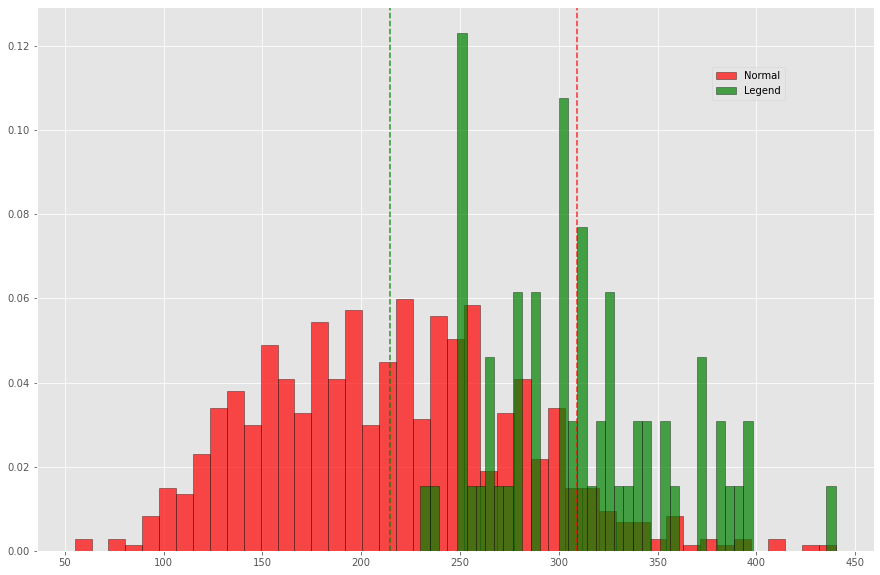

In [92]:
two_histograms(pokemon_5_normal['sum'], pokemon_5_legend['sum'], 'Normal', 'Legend', c1='red', c2='green')

Normal - red
Legend - green


<AxesSubplot:>

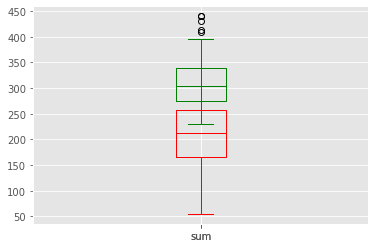

In [93]:
print(f'Normal - red\nLegend - green')
pokemon_5_normal.boxplot(column=['sum'], color='red')
pokemon_5_legend.boxplot(column=['sum'], color='green')

## график умножения

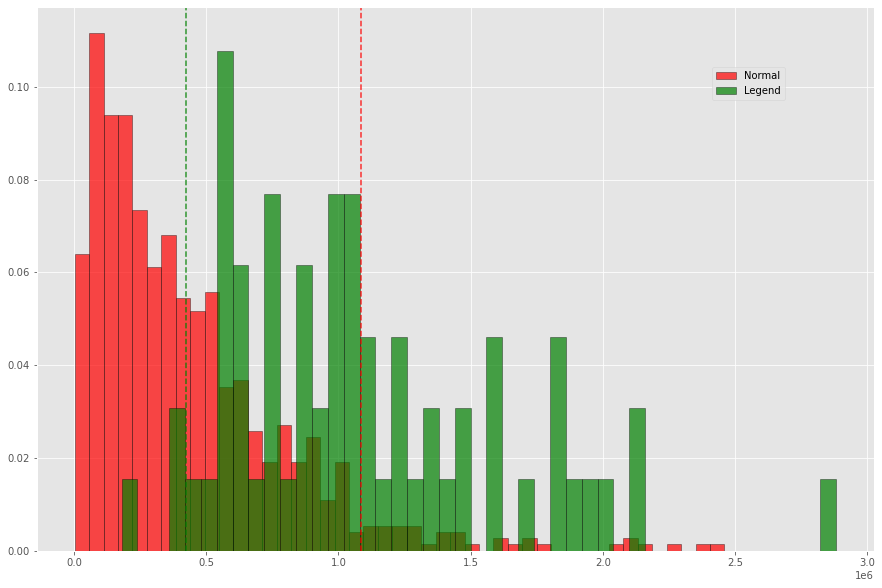

In [66]:
two_histograms(pokemon_5_normal['multi'], pokemon_5_legend['multi'], 'Normal', 'Legend', c1='red', c2='green')

Normal - red
Legend - green


<AxesSubplot:>

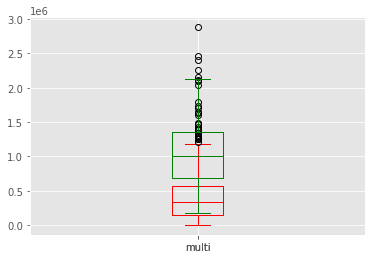

In [67]:
print(f'Normal - red\nLegend - green')
pokemon_5_normal.boxplot(column=['multi'], color='red')
pokemon_5_legend.boxplot(column=['multi'], color='green')

<p style='font-size: 19px; padding: 33px;border:1px solid #3A2324 ;color: #3A2324'>Легендарные покемоны не просто так легендарны</p>

<div style='padding: 66px'></div>

<div class="alert alert-info"style="border: 4px solid #3A2324;background: #E1E6E1;  color: #3A2324">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [94]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

- создаем df

In [95]:
pokemon_6 = pd.DataFrame(pokemon)

- убираем строки - где комбинации указанных классов | как мы сделали в первой и второй задаче

In [97]:
# ['Rock', 'Ground'
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 1'] == best_defence_class[0]) & \
                               (pokemon_6['Class 2'] == best_defence_class[1])], inplace = True)
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 2'] == best_defence_class[1]) & \
                              (pokemon_6['Class 1'] == best_defence_class[0])], inplace = True)
# 'Rock' 'Steel',
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 1'] == best_defence_class[0]) & \
                               (pokemon_6['Class 2'] == best_defence_class[2])], inplace = True)
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 2'] == best_defence_class[2]) & \
                              (pokemon_6['Class 1'] == best_defence_class[0])], inplace = True)
# 'Rock' 'Ice']
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 1'] == best_defence_class[0]) & \
                               (pokemon_6['Class 2'] == best_defence_class[3])], inplace = True)
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 2'] == best_defence_class[3]) & \
                              (pokemon_6['Class 1'] == best_defence_class[0])], inplace = True)
#  'Ground','Steel'
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 1'] == best_defence_class[1]) & \
                               (pokemon_6['Class 2'] == best_defence_class[2])], inplace = True)
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 2'] == best_defence_class[2]) & \
                              (pokemon_6['Class 1'] == best_defence_class[1])], inplace = True)
# 'Ground','Ice'
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 1'] == best_defence_class[1]) & \
                               (pokemon_6['Class 2'] == best_defence_class[3])], inplace = True)
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 2'] == best_defence_class[3]) & \
                              (pokemon_6['Class 1'] == best_defence_class[1])], inplace = True)
#'Steel''Ice'
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 1'] == best_defence_class[2]) & \
                               (pokemon_6['Class 2'] == best_defence_class[3])], inplace = True)
pokemon_6.drop(pokemon_6.index[(pokemon_6['Class 2'] == best_defence_class[3]) & \
                              (pokemon_6['Class 1'] == best_defence_class[2])], inplace = True)

- столбец с классами, которые выделил Оук. Далее удаляем пустые строки

In [98]:
#  новый столбец
pokemon_6['class'] = pokemon.apply(best_class, axis=1)

# # Удаляем строки
pokemon_6.dropna(inplace=True)
pokemon_6.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,class
36,37,Nidoqueen,Poison,Ground,90,92,87,75,85,76,False,Ground
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,False,Ground
88,89,Magnemite,Electric,Steel,25,35,70,95,55,45,False,Steel
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,False,Steel
94,95,Dewgong,Water,Ice,90,70,80,70,95,70,False,Ice


- создаем список из этих классов 

In [99]:
Rock = pokemon[(pokemon['class'] == best_defence_class[0])]
Ground = pokemon[(pokemon['class'] == best_defence_class[1])]
Steel = pokemon[(pokemon['class'] == best_defence_class[2])]
Ice = pokemon[(pokemon['class'] == best_defence_class[3])]
list_best = [Rock, Ground, Steel, Ice]

- считаем среднее значение каждого класса 

In [100]:
i=0
for idx, val in enumerate(list_best):
    print('Класс ', best_defence_class[i], '\n', val.agg({'Defense': ['mean', 'count', 'sum']}), '\n\n')

    i = i+1

Класс  Rock 
            Defense
mean    107.086207
count    58.000000
sum    6211.000000 


Класс  Ground 
            Defense
mean     84.586207
count    58.000000
sum    4906.000000 


Класс  Steel 
         Defense
mean    109.325
count    40.000
sum    4373.000 


Класс  Ice 
            Defense
mean     78.515152
count    33.000000
sum    2591.000000 




- функция для четырёх графиков 

In [70]:
def four_histograms(x, y, z, l):
    edc = '#000'
    bs = 43
    plt.figure(figsize=(15, 10))
    x.hist(alpha=0.7, bins = bs, color='#000', weights=[1./len(x)]*len(x), label=best_defence_class[0], edgecolor=edc)  
    y.hist(alpha=0.7, bins = bs, color='#fff', weights=[1./len(y)]*len(y), label=best_defence_class[1], edgecolor=edc)
    z.hist(alpha=0.7, bins = bs, color='red', weights=[1./len(z)]*len(z), label=best_defence_class[2], edgecolor=edc)  
    l.hist(alpha=0.7, bins = bs, color='green', weights=[1./len(l)]*len(l), label=best_defence_class[3], edgecolor=edc)
    plt.axvline(x.mean(), color='green', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='green', alpha=0.8, linestyle='dashed')
    plt.axvline(z.mean(), color='#fff', alpha=0.8, linestyle='dashed')
    plt.axvline(l.mean(), color='#fff', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name, z.name, l.name])
    plt.legend(loc='upper right', bbox_to_anchor=(0.90, 0.90))

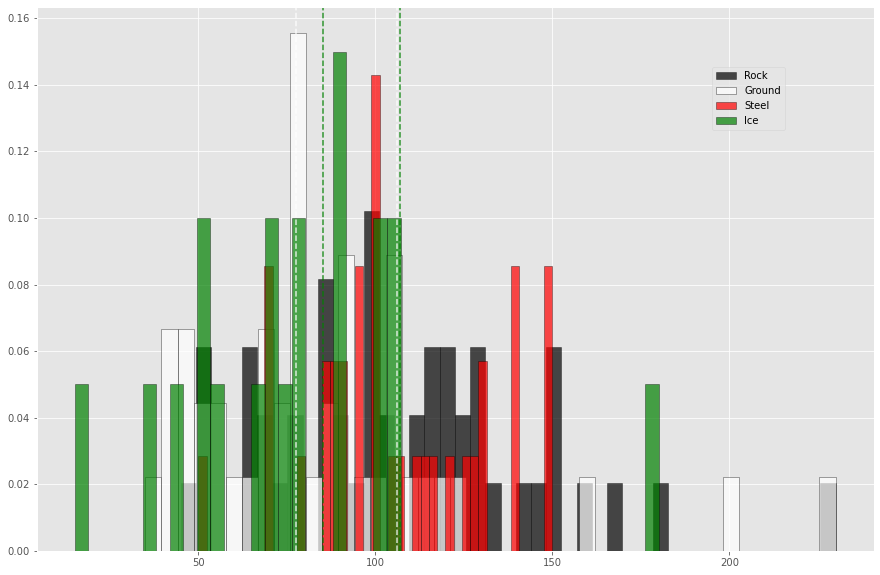

In [71]:
four_histograms(Rock['Defense'], Ground['Defense'], Steel['Defense'], Ice['Defense'])


<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

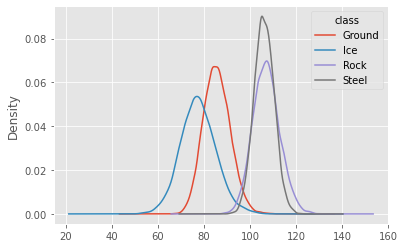

In [72]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(10000):
    boot_mean = pokemon_6.sample(frac=1, replace=True).groupby(
        'class')['Defense'].mean()  
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

# По расчётам и графиком я бы не сказала что указанные классы одинаковы по Defense